# 02-eda.ipynb  
## Exploração de Dados – Tendências de Mercado de Varejo Online  
**Objetivo**: analisar vendas por categoria, evolução temporal, distribuição de preços e avaliações, usando o dataset limpo `ecommerce_clean.csv`.


## Dependências  
Para plotar gráficos, precisamos do Matplotlib. Execute o próximo bloco.

In [4]:
!pip install matplotlib

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Para exibir gráficos inline
%matplotlib inline

In [6]:
# 1) Carregar dataset limpo
df = pd.read_csv("../data/ecommerce_clean.csv", parse_dates=[
    "order_purchase_timestamp", 
    "order_delivered_customer_date", 
    "review_creation_date"
])


## 1. Visão geral do dataset  
Verificamos dimensão, tipos de dados e primeiras linhas.

In [7]:
print("Shape:", df.shape)
print("\nTipos de dados:\n", df.dtypes)
display(df.head())


Shape: (110839, 31)

Tipos de dados:
 order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                        object
order_delivered_carrier_date             object
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date            object
delivery_time                             int64
order_item_id                             int64
product_id                               object
seller_id                                object
shipping_limit_date                      object
price                                   float64
freight_value                           float64
total_price                             float64
product_category_name                    object
product_name_lenght                     float64
product_description_lenght              float64
product_photos_qty                      float64
pr

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,order_item_id,...,product_length_cm,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,review_score,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8,1,...,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,4.0,2017-10-11 00:00:00,2017-10-12 03:43:48
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13,1,...,19.0,13.0,19.0,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,4.0,2018-08-08 00:00:00,2018-08-08 18:37:50
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9,1,...,24.0,19.0,21.0,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,5.0,2018-08-18 00:00:00,2018-08-22 19:07:58
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13,1,...,30.0,10.0,20.0,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,5.0,2017-12-03 00:00:00,2017-12-05 19:21:58
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2,1,...,51.0,15.0,15.0,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,5.0,2018-02-17 00:00:00,2018-02-18 13:02:51


## 2. Estatísticas descritivas  
Resumo numérico das variáveis numéricas.

In [8]:
display(df.describe())

,order_purchase_timestamp,order_delivered_customer_date,delivery_time,order_item_id,price,freight_value,total_price,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_zip_code_prefix,review_score
count,110839,110839,110839.000000,110839.000000,110839.000000,110839.000000,110839.000000,109294.000000,109294.000000,109294.000000,110821.000000,110821.000000,110821.000000,110821.000000,110839.000000,110012.000000
mean,2018-01-01 16:53:03.857396736,2018-01-14 04:20:16.402466560,12.012414,1.198919,119.806508,19.937040,119.806508,48.810310,786.372555,2.207733,2087.825430,30.150549,16.545754,22.992186,35158.500708,4.081173
min,2016-09-15 12:16:38,2016-10-11 13:46:32,0.000000,1.000000,0.850000,0.000000,0.850000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1003.000000,1.000000
25%,2017-09-14 16:04:54.500000,2017-09-26 17:35:15,6.000000,1.000000,39.900000,13.080000,39.900000,42.000000,347.000000,1.000000,300.000000,18.000000,8.000000,15.000000,11250.000000,4.000000
50%,2018-01-20 17:06:24,2018-02-02 17:29:57,10.000000,1.000000,74.900000,16.250000,74.900000,52.000000,601.000000,1.000000,700.000000,25.000000,13.000000,20.000000,24344.000000,5.000000
75%,2018-05-04 22:50:18,2018-05-15 17:55:11,15.000000,1.000000,133.900000,21.150000,133.900000,57.000000,985.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,59068.000000,5.000000
max,2018-08-29 15:00:37,2018-10-17 13:22:46,209.000000,21.000000,6735.000000,409.680000,6735.000000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,99980.000000,5.000000
std,NaN,NaN,9.445470,0.708657,181.956601,15.674511,181.956601,10.007651,650.966975,1.719631,3739.932891,16.119827,13.402965,11.687825,29904.438863,1.347749


## 3. Vendas por categoria de produto  
Agrupamos por categoria para ver volume (quantidade de pedidos) e receita total.

In [9]:
vendas_cat = (
    df.groupby("product_category_name")
      .agg(pedidos=("order_id", "nunique"),
           receita_total=("total_price", "sum"))
      .sort_values("receita_total", ascending=False)
)

display(vendas_cat.head(10))

,pedidos,receita_total
product_category_name,,
beleza_saude,8649,1237519.84
relogios_presentes,5493,1166968.63
cama_mesa_banho,9272,1037177.69
esporte_lazer,7530,960031.59
informatica_acessorios,6529,896132.29
moveis_decoracao,6307,718344.78
utilidades_domesticas,5743,617836.73
cool_stuff,3559,612071.86
automotivo,3809,580146.14


## 4. Evolução mensal das vendas  
Analisamos a receita agregada por mês de compra.

<Figure size 640x480 with 0 Axes>

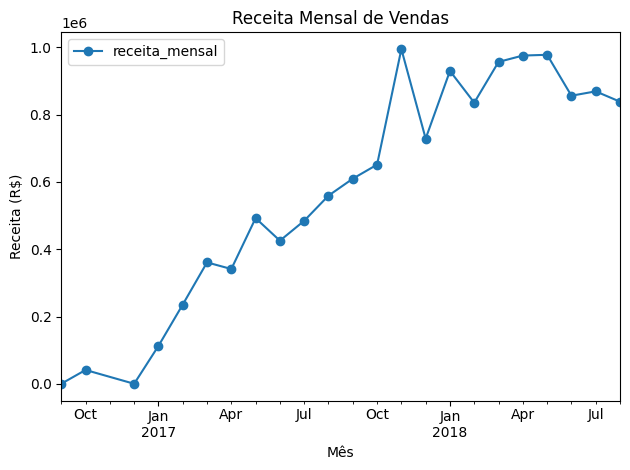

In [10]:
# Criar coluna de período mensal
df["order_month"] = df["order_purchase_timestamp"].dt.to_period("M")

monthly = (
    df.groupby("order_month")
      .agg(receita_mensal=("total_price", "sum"))
      .sort_index()
)

# Plot
plt.figure()
monthly.plot(marker="o")
plt.title("Receita Mensal de Vendas")
plt.xlabel("Mês")
plt.ylabel("Receita (R$)")
plt.tight_layout()


## 5. Distribuição de preços e avaliações  
Histogramas de preço dos produtos e de notas de avaliação.

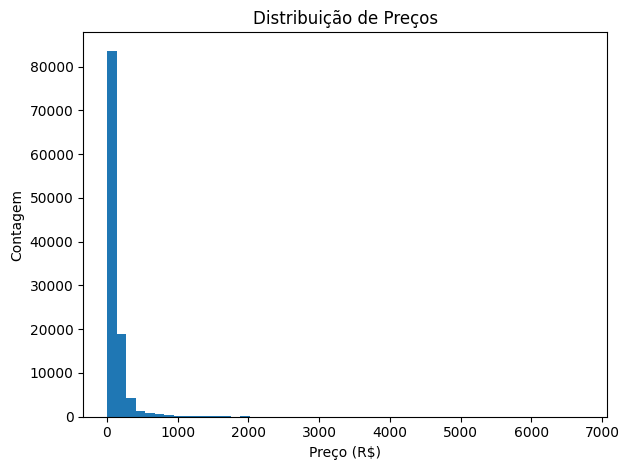

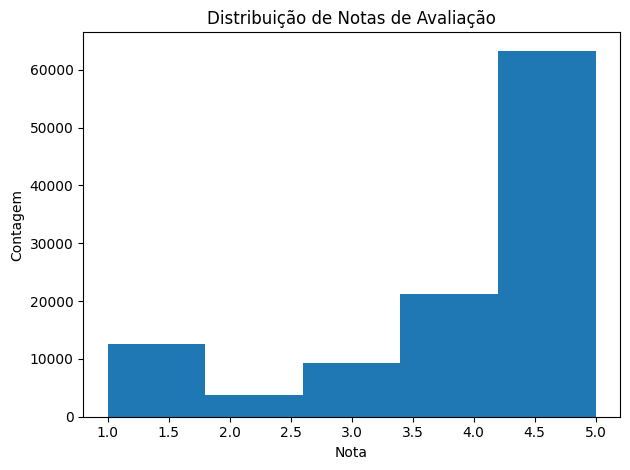

In [11]:
# Distribuição de preço
plt.figure()
plt.hist(df["price"].dropna(), bins=50)
plt.title("Distribuição de Preços")
plt.xlabel("Preço (R$)")
plt.ylabel("Contagem")
plt.tight_layout()

# Distribuição de avaliações
plt.figure()
plt.hist(df["review_score"].dropna(), bins=5, range=(1,5))
plt.title("Distribuição de Notas de Avaliação")
plt.xlabel("Nota")
plt.ylabel("Contagem")
plt.tight_layout()
